In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
%matplotlib inline

In [2]:
file_path = "Data/SPAM Data.csv"
df = pd.read_csv(file_path)
df.head()

,Category,Message,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5574 non-null   object
 1   Message     5574 non-null   object
 2   Unnamed: 2  1 non-null      object
dtypes: object(3)
memory usage: 130.8+ KB


In [4]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(df['Message'])
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.3, random_state=120)

In [5]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9935913868238914

In [6]:
model.score(X_test, y_test)

0.9802749551703527

In [7]:
def visualize(label):
    words = ''
    
    for text in df[df['Category']==label]['Message']:
        text = text.lower()
        words+=text + ' '
    wordcloud = WordCloud(width=1000,height=500).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

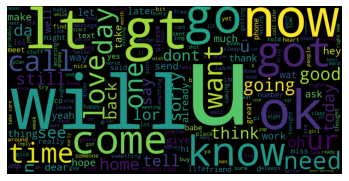

In [8]:
visualize('ham')

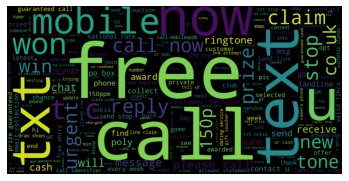

In [9]:
visualize('spam')